Name: Bhargavi Poyekar

Class: BE COMPS

Batch: B

UID: 2018130040

**Objective**:

Perform statistical data analysis such as: Estimators of the main statistical measures (mean, variance, standard deviation, covariance correlation, standard error), Main distributions ( Normal distribution, chi-square distribution), Hypothesis testing,  pair-wise association (Pearson correlation test, t-test, ANOVA), Non-parametric test (Spearman rank0 etc)

This notebook performs statistical analysis on Auto MPG dataset using Python progamming. The descriptive statistics is presented through mean, median, mode, variance, skewness, quantile, etc. Hypothesis testing is performed for checking the independence between two variables, normality test, correlation between two continuous variables, parametric and non-parametric significance tests.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn.preprocessing import PowerTransformer
import itertools

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Load the dataset (Use pandas )



 

 


In [ ]:
auto_data = pd.read_csv("/content/drive/MyDrive/DS-Lab/Lab/Exp4/auto_data.csv", na_values=['?'])

In [ ]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


The info given above gives the insights about automobile's data read using csv. It contains 398 samples and 9 features.

## 2. Data Preprocessing (Handling NA values)

In [ ]:
# count of null values in each column
print(auto_data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


Now we can see that there are 6 null values in horsepower column. First we need to convert the horsepower column from object to numeric

In [ ]:
auto_data['horsepower'] = auto_data['horsepower'].astype(str).astype(float)

### Replacing null values in horsepower column with median

In [ ]:
auto_data['horsepower']=auto_data['horsepower'].fillna(auto_data['horsepower'].median())

In [ ]:
# count of null values in each column
print(auto_data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


Now all there is no null value present in the dataset.

Now two distinct list for categorical and numerical column names are created as the analysis differ for both the types. For that the datatypes of each column are introspected and if it is of type object then it's categorical and else numerical.

In [ ]:
categorical_features = list(auto_data.select_dtypes(include=['object']).columns)
numerical_features = list(auto_data.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {categorical_features}')
print(f'numerical variables:  {numerical_features}')

categorical variables:  ['origin', 'name']
numerical variables:  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [ ]:
# let's inspect how many unique values are there in each column.
auto_data.nunique(axis=0)

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

As there are very few unique values for cylinders and model_year, so it's safe to make them categorical instead of numeric.

In [ ]:
# cylinders and model_year also seems to be categorical so lets update the lists
categorical_features.extend(['cylinders', 'model_year'])
numerical_features.remove('cylinders')
numerical_features.remove('model_year')

print(f'categorical variables:  {categorical_features}')
print(f'numerical variables:  {numerical_features}')

categorical variables:  ['origin', 'name', 'cylinders', 'model_year']
numerical variables:  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


# Descriptive Statistics

## Amount and Frequency Statistics

### Sum

In [ ]:
auto_data.sum()

mpg                                                        9358.8
cylinders                                                    2171
displacement                                              76983.5
horsepower                                                41513.0
weight                                                    1182229
acceleration                                               6196.1
model_year                                                  30252
origin          usausausausausausausausausausausausausausajapa...
name            chevrolet chevelle malibubuick skylark 320plym...
dtype: object

### Count

In [ ]:
auto_data.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model_year      398
origin          398
name            398
dtype: int64

## Central Tendency Statistics

### Mean

In [ ]:
auto_data.mean()

mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.304020
weight          2970.424623
acceleration      15.568090
model_year        76.010050
dtype: float64

### Median

In [ ]:
auto_data.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model_year        76.0
dtype: float64

### Mode

In [ ]:
auto_data.mode()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,13.0,4.0,97.0,150.0,1985,14.5,73.0,usa,ford pinto
1,NaN,NaN,NaN,NaN,2130,NaN,NaN,NaN,NaN


## Dispersion Statistics

### Minimum

In [ ]:
auto_data.min()

mpg                                 9.0
cylinders                             3
displacement                       68.0
horsepower                         46.0
weight                             1613
acceleration                        8.0
model_year                           70
origin                           europe
name            amc ambassador brougham
dtype: object

### Maximum

In [ ]:
auto_data.max()

mpg                         46.6
cylinders                      8
displacement               455.0
horsepower                 230.0
weight                      5140
acceleration                24.8
model_year                    82
origin                       usa
name            vw rabbit custom
dtype: object

### Variance

In [ ]:
auto_data.var()

mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1460.969052
weight          717140.990526
acceleration         7.604848
model_year          13.672443
dtype: float64

### Standard Deviation

In [ ]:
auto_data.std()

mpg               7.815984
cylinders         1.701004
displacement    104.269838
horsepower       38.222625
weight          846.841774
acceleration      2.757689
model_year        3.697627
dtype: float64

### Skewness

In [ ]:
auto_data.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.106224
weight          0.531063
acceleration    0.278777
model_year      0.011535
dtype: float64

### Quantile

In [ ]:
auto_data.quantile()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model_year        76.0
Name: 0.5, dtype: float64

### Describe

In [ ]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000



## Correlation Matrix

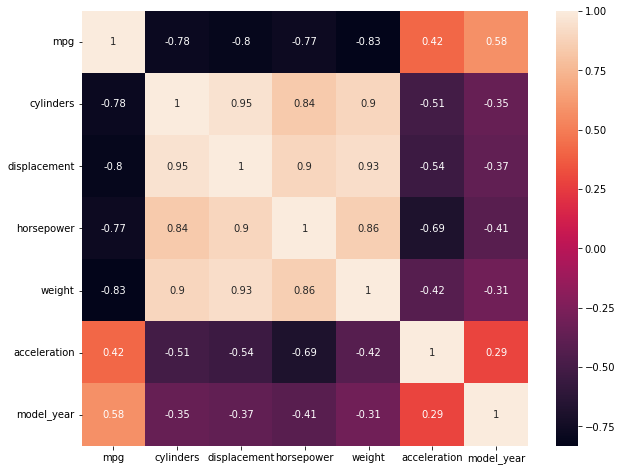

In [ ]:
correlation_data = auto_data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(correlation_data, annot=True)
plt.show()

Arranging columns according to their correlation with mpg variable in descending order

In [ ]:
correlation_values = correlation_data['mpg'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation of Features wrt MPG")
print(abs(correlation_values).sort_values(ascending=False))

Correlation of Features wrt MPG
mpg             1.000000
weight          0.831741
displacement    0.804203
cylinders       0.775396
horsepower      0.773453
model_year      0.579267
acceleration    0.420289
Name: mpg, dtype: float64


We can see that the weight variable has the highest correlation with the target variable mpg i.e. 0.831741

As origin and name consists of text data so it needs some preprocessing. Removing all extra spaces from each string, otherwise the same string with different spacings will be treated as different categories which should not be the case.

In [ ]:
# remove extra spaces if any
for col in ['origin', 'name']:
    auto_data[col] = auto_data[col].apply(lambda x: ' '.join(x.split()))

In [ ]:
auto_data['mpg_level'] = auto_data['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
categorical_features.append('mpg_level')
print(f'categorical variables:  {categorical_features}')

categorical variables:  ['origin', 'name', 'cylinders', 'model_year', 'mpg_level']


# Hypothesis Testing

In [ ]:
alpha = 0.05

## Tests for independence between two categorical variables



### Pearson's Chi-square test
The Chi-square statistic is a **non-parametric statistic** tool designed to analyze group differences when the dependent variable is measured at a nominal level(ordinal data can also be used). It is commonly used to compare observed data with data we would expect to obtain according to a specific hypothesis.

$$\large \chi ^{2} = \sum \frac{(O-E)^{2}}{E}$$

Where,<br>
&emsp;&emsp;O : Observed (the actual count of cases in each cell of the table)<br>
&emsp;&emsp;E : Expected value (calculated below)<br>
&emsp;&emsp;$\chi ^{2}$ : The cell Chi-square value

**Assumptions**<br>
&emsp;&emsp;&emsp;**1.** The test becomes invalid if any of the expected values are below 5<br>
&emsp;&emsp;&emsp;**2.** The p value calculated is not exact but approximate and converges to exact on increasing data(so not good for small sample size)<br>
&emsp;&emsp;&emsp;**3.** The number of observations must be 20+<br>

So, if the expected cell counts are small, it is better to use an exact test as the chi-squared test is no longer a good approximation in such cases. To overcome this we will be using fisher exact test.

In [ ]:
# Contingency Table (aka frequency table)
pd.crosstab(auto_data.origin, auto_data.model_year)

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,5,4,5,7,6,6,8,4,6,4,9,4,2
japan,2,4,5,4,6,4,4,6,8,2,13,12,9
usa,22,20,18,29,15,20,22,18,22,23,7,13,20


So chi2 assumption failed for every pair but it's not that it cannot be aplied.

The contingency table of origin and model_year is still good to try as most values are >= 5.<br>

&emsp;&emsp;&emsp;$H_{0}$: origin and model_year are independent. &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\alpha=0.05$

In [ ]:
observed_values = pd.crosstab(auto_data.origin, auto_data.mpg_level).values
observed_values

array([[ 24,   2,  44],
       [ 49,   0,  30],
       [ 24,  90, 135]])

In [ ]:
chi2, p, dof, expected_values = stats.chi2_contingency(observed_values)
chi2, p, dof, expected_values

(124.67602279448344,
 5.353157991435908e-26,
 4,
 array([[ 17.06030151,  16.18090452,  36.75879397],
        [ 19.25376884,  18.26130653,  41.48492462],
        [ 60.68592965,  57.55778894, 130.75628141]]))

In [ ]:
if p <= alpha:
    print(f'Rejected H0 under significance level {alpha} origin and model_year are dependent.')
else:
    print(f'Fail to reject H0 due to lack of evidence under significance level {alpha} origin and model_year are independent.')

Rejected H0 under significance level 0.05 origin and model_year are dependent.


Testing dependency of all categorical attributes with mpg_level

In [ ]:
auto_data_categorical_label =  pd.concat([auto_data.loc[:, ['origin', 'mpg_level']].apply(lambda x: LabelEncoder().fit_transform(x)),
                           auto_data.loc[: , 'cylinders': 'model_year']], axis=1)

auto_data_categorical_label.head()

,origin,mpg_level,cylinders,displacement,horsepower,weight,acceleration,model_year
0,2,2,8,307.0,130.0,3504,12.0,70
1,2,1,8,350.0,165.0,3693,11.5,70
2,2,2,8,318.0,150.0,3436,11.0,70
3,2,1,8,304.0,150.0,3433,12.0,70
4,2,2,8,302.0,140.0,3449,10.5,70


In [ ]:
chi2_res = feature_selection.chi2(auto_data_categorical_label, auto_data.mpg_level)
df_chi2 = pd.DataFrame({
    'attr1': 'mpg_level',
    'attr2': auto_data_categorical_label.columns,
    'chi2': chi2_res[0],
    'p': chi2_res[1],
    'alpha': alpha
})
df_chi2['H0'] = df_chi2.p.apply(lambda x: 'rejected' if x <= alpha else 'fail to reject')
df_chi2['relation'] = df_chi2.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')
df_chi2

,attr1,attr2,chi2,p,alpha,H0,relation
0,mpg_level,origin,29.860966,3.279244e-07,0.05,rejected,dependent
1,mpg_level,mpg_level,214.203922,3.063440e-47,0.05,rejected,dependent
2,mpg_level,cylinders,129.030964,9.578163e-29,0.05,rejected,dependent
3,mpg_level,displacement,15225.127486,0.000000e+00,0.05,rejected,dependent
4,mpg_level,horsepower,3721.271925,0.000000e+00,0.05,rejected,dependent
5,mpg_level,weight,66257.958068,0.000000e+00,0.05,rejected,dependent
6,mpg_level,acceleration,43.302779,3.952948e-10,0.05,rejected,dependent
7,mpg_level,model_year,22.195790,1.514417e-05,0.05,rejected,dependent


From the above table we can see that the null hypothesis of independency is rejected for all pairs and mpg_level is dependent on all other features present in the dataset.

## Statistical Tests for Numerical Attributes

### Normality Test


#### 1. Visual Normality Checks
Visual check for normality using -
1. Histogram

##### Histograms for all features

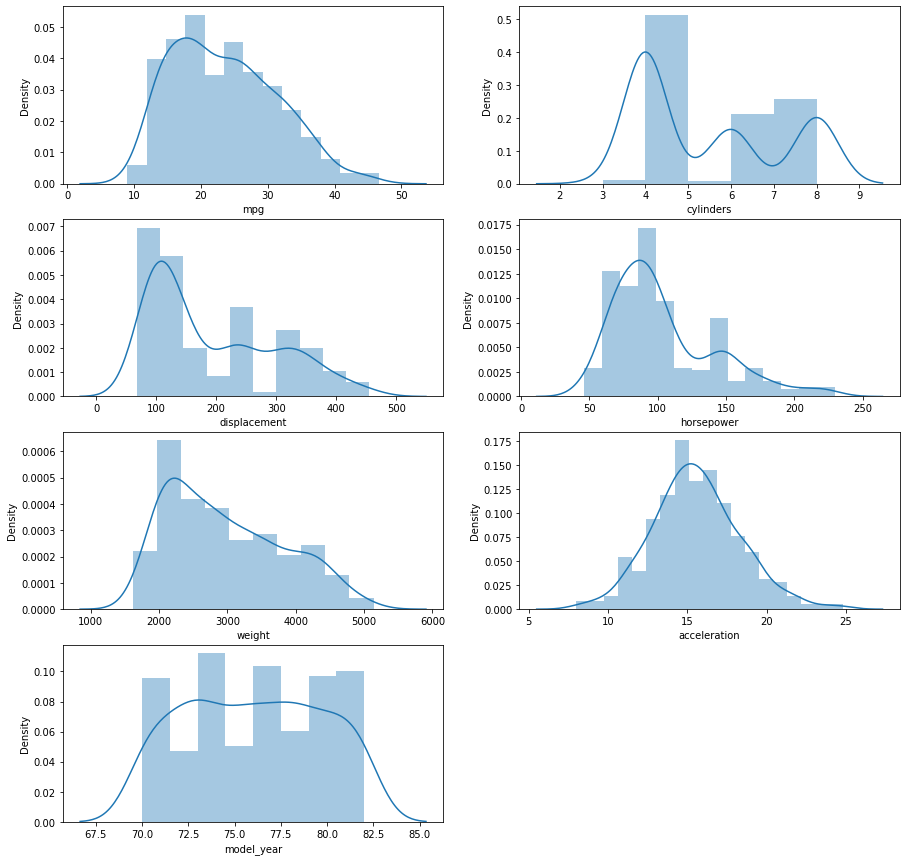

In [ ]:
df_plot = auto_data.iloc[:, 0:7]

plt.figure(figsize=(15,15))
col = df_plot.columns
for i in range(0,len(col)):
    plt.subplot(len(col)//2+1,2,i+1)
    sns.distplot(auto_data[col[i]]);
    plt.xlabel(col[i])

Insights from the above plot:
* acceleration is the only distribution which is gaussian. There are few values in acceleration which lie outside the whiskers(the bars extending outwards from the box), these are outliers.
* distributions of mpg & weight seems to be right-skewed gaussian.
* distributions of displacement & horsepower seems to be far from gaussian.

Checking whether mpg and weight are log-normal or not.

A log-normal distribution is a distribution of a random variable whose logarithm is normally distributed. Thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution.

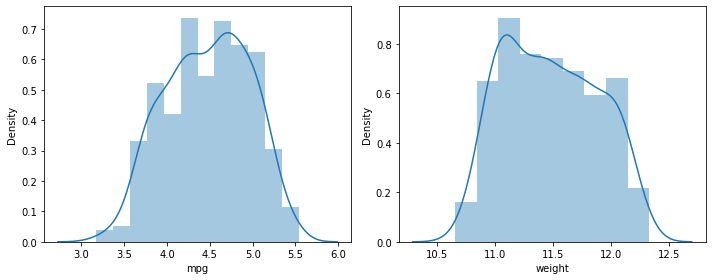

In [ ]:
fig = plt.figure(1, (10, 4))

ax = plt.subplot(1,2,1)
sns.distplot(np.log2(auto_data.mpg))
plt.tight_layout()

ax = plt.subplot(1,2,2)
sns.distplot(np.log2(auto_data.weight))
plt.tight_layout()

plt.show()

So after applying log transformation we find that weight is not log-normal but mpg visually looks like log-normal.

## Tests for correlation between two continous variables

### Covariance

$$\large Cov(x,y) = \frac{\sum (x_{_i}-\bar{x})(y_{_i}-\bar{y})}{n-1}$$

The use of the mean in the calculation suggests the need for each data sample to have a Gaussian or Gaussian-like distribution hence its **parametric statistic**. Also it's hard to interpret because it can take any value.

### Linear Association (Pearson's Correlation)

$$\large Corr_{_p}(x,y) = \frac{Cov(x,y)}{\sigma _{x}\sigma _{y}}$$

The Pearson correlation coefficient is just a **normalized covariance** between the two variables to give an interpretable score such that $Corr_{p}(x,y)\in [-1,1]$. It can be used to summarize the strength of the linear relationship between two data samples. The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution hence it's a **parametric statistic**.

As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).

**Assumptions of pearson correlation**:<br>
&emsp;&emsp;&emsp;**1.** Both variables should have a Gaussian or Gaussian-like distribution.<br>
&emsp;&emsp;&emsp;**2.** Relationship between the variables should be linear.<br>
&emsp;&emsp;&emsp;**3.** Homoscedasticity i.e., a sequence of random variables where all its random variables have the same finite variance.<br>

Also Pearson is quite sensitive to outliers.<br>

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables. In these cases, even when variables have a strong association, Pearson’s correlation would be low. Further, the two variables being considered may have a non-Gaussian distribution. To properly identify association between variables with non-linear relationships, we can use rank-based correlation approaches.

### Ordinal Association (Rank correlation)
Rank correlation refers to methods that quantify the association between variables using the ordinal relationship between the values rather than the specific values. In this we first sort data in ascending order, then assign integer rank to them and then use it to find the correlation b/w variables. Because no distribution for the values is assumed, rank correlation methods are referred to as distribution-free correlation or nonparametric correlation. 

### Spearman's Rank Correlation

$$\large Corr_{_s}(x,y) = \frac{Cov(rank(x), rank(y))}{\sigma _{rank(x)}\sigma _{rank(y)}}$$

Spearman's Correlation is a **non-parametric rank correlation** and is also interpretable because $Corr_{s}(x,y)\in [-1,1]$. In this instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated by converting the raw data into rank data hence non-parametric. **This is a common approach used in non-parametric statistics.**

As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).



Correlation test b/w mpg and other attribute:

&emsp;&emsp;&emsp;$H_{0}$: mpg and other attribute are not correlated. &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\alpha=0.05$

In [ ]:
for num in numerical_features:
    if num == 'mpg':
        continue
    
    corr, p = stats.spearmanr(auto_data.mpg, auto_data[num])

    print(f'\nmpg & {num}\n')
    print(f'Correlation: {round(corr, 4)} \t p: {p}')

    if p <= alpha:
        print(f'Rejected H0 under significance level {alpha}, mpg & {num} are correlated\n')
    else:
        print(f'Fail to reject H0 due to lack of evidence under significance level {alpha}, mpg & {num} are not correlated\n')


mpg & displacement

Correlation: -0.8557 	 p: 2.3646353779685863e-115
Rejected H0 under significance level 0.05, mpg & displacement are correlated


mpg & horsepower

Correlation: -0.848 	 p: 3.1556146766511463e-111
Rejected H0 under significance level 0.05, mpg & horsepower are correlated


mpg & weight

Correlation: -0.8749 	 p: 8.643768710424627e-127
Rejected H0 under significance level 0.05, mpg & weight are correlated


mpg & acceleration

Correlation: 0.4387 	 p: 3.7760574238172543e-20
Rejected H0 under significance level 0.05, mpg & acceleration are correlated



So all the H0 are rejected under the significance level of 5%. Except acceleration all the other correlations are very high.


Correlation between every pair

In [ ]:
def test_correlation(x1, x2, method='spearman', alpha=0.05):
    # this function returns correlation, p-value and H0 for `x1` & `x2`
    
    ALLOWED_METHODS = ['pearson', 'spearman', 'kendall']
    if method not in ALLOWED_METHODS:
        raise ValueError(f'allowed methods are {ALLOWED_METHODS}')
        
    if method=='pearson':
        corr, p = stats.pearsonr(x1,x2)
    elif method=='spearman':
        corr, p = stats.spearmanr(x1,x2)
    else:
        corr, p = stats.kendalltau(x1,x2)
    
    h0 = (
    'rejected'
    if p<=alpha else
    'fail to reject')
    
    return corr, p, h0

In [ ]:
df_corr = pd.DataFrame(columns=['attr1', 'attr2', 'corr', 'p', 'H0'])

for combo in itertools.combinations(numerical_features, r=2):
    corr, p, h0 = test_correlation(auto_data[combo[0]], auto_data[combo[1]])
    df_corr = df_corr.append({'attr1':combo[0], 'attr2':combo[1],'corr':round(corr, 5), 'p':p, 'H0':h0}, ignore_index=True)
    
df_corr

,attr1,attr2,corr,p,H0
0,mpg,displacement,-0.85569,2.364635e-115,rejected
1,mpg,horsepower,-0.84797,3.155615e-111,rejected
2,mpg,weight,-0.87495,8.643769e-127,rejected
3,mpg,acceleration,0.43868,3.776057e-20,rejected
4,displacement,horsepower,0.86994,1.209720e-123,rejected
5,displacement,weight,0.94599,8.192161e-196,rejected
6,displacement,acceleration,-0.49651,3.658901e-26,rejected
7,horsepower,weight,0.87215,5.141212e-125,rejected
8,horsepower,acceleration,-0.65136,2.046249e-49,rejected
9,weight,acceleration,-0.40455,4.189304e-17,rejected


Correlation of pairs (mpg, acceleration), (displacement, acceleration) and (weight, acceleration) is moderate whereas remaining all pairs has very high correlation between them.

# Inference
1. Pearson's Chi-square test shows that the target variable mpg_level is dependent on all other features present in the dataset.
2. The visual normality test suggested that only acceleration variable is somewhere near to normal distribution. 
3. Pearson's Correlation test suggests that all the features present in the dataset are correlated with the target feature mpg_level.
